Weighted Pre-Treatment Speed: 28.82 mph
Weighted Post-Treatment Speed: 18.33 mph
T-Statistic: 214.479, P-Value: 0.000


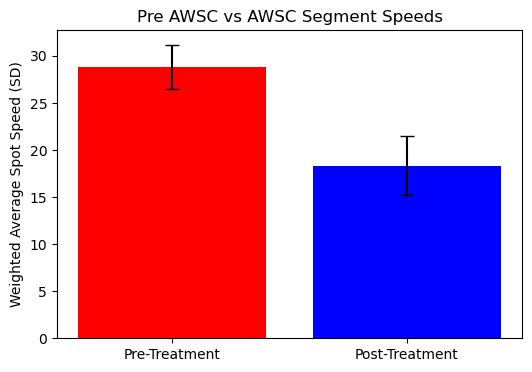

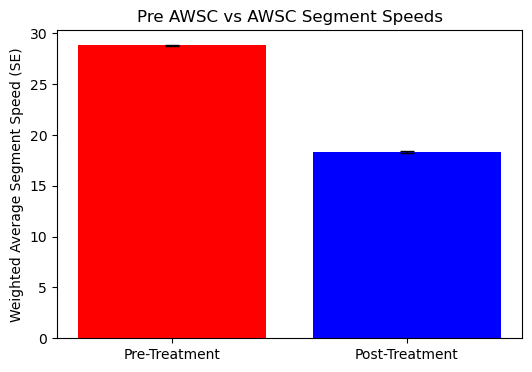

        pre_speeds  post_speeds
count  3360.000000  3360.000000
mean     29.925893    19.049702
std       2.708116     3.339601
min      22.000000    12.000000
25%      28.000000    17.000000
50%      30.000000    18.000000
75%      32.000000    21.000000
max      36.000000    30.000000


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Yosemite_pre.csv')
post_treatment = pd.read_csv('data/Yosemite_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)



In [2]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

Weighted Pre-Treatment 85th Speed Percentile: 35.37 mph
Weighted Post-Treatment 85th Speed Percentile: 24.56 mph
Weighted Pre-Treatment 95th Speed Percentile: 38.53 mph
Weighted Post-Treatment 95th Speed Percentile: 27.88 mph
Highest value for pre-treatment'85th Speed Percentile': 45.0 mph Highest value for post-treatment'85th Speed Percentile': 42.0 mph
Data Periods                                             Jan 01, 2019 - Dec 31, 2019
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                            Yosemite Drive / 1073044423 / 1
Line Zone Length (Miles)                                                       0.059
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         283
Zone is Bi-Direction                            

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,85th Speed Percentile,95th Speed Percentile
3517,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1073044423 / 1,0.059,yes,283,yes,2019-10,2: Tuesday (Tu-Tu),...,160,36,6,38.801,0.922,9.48,0.02,21.0,42.0,46.0
3469,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1020855126 / 1,0.026,yes,283,yes,2019-10,2: Tuesday (Tu-Tu),...,175,34,3,39.300,0.875,4.63,0.02,15.0,42.0,46.0
3481,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1020855126 / 1,0.026,yes,283,yes,2019-10,4: Thursday (Th-Th),...,222,36,3,39.300,0.907,5.89,0.02,21.0,42.0,47.0
3511,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1073044423 / 1,0.059,yes,283,yes,2019-10,1: Monday (M-M),...,278,35,6,38.801,0.893,16.49,0.05,23.0,42.0,45.0
1309,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1077985132 / 2,0.070,yes,283,yes,2019-04,2: Tuesday (Tu-Tu),...,309,35,7,37.927,0.934,21.70,0.04,24.0,42.0,46.0
1603,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1073044423 / 1,0.059,yes,283,yes,2019-05,3: Wednesday (W-W),...,287,36,6,37.446,0.966,17.03,0.02,25.0,42.0,45.0
1615,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1073044423 / 1,0.059,yes,283,yes,2019-05,5: Friday (F-F),...,305,36,6,37.446,0.951,18.09,0.02,24.0,42.0,45.0
1567,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1020855126 / 1,0.026,yes,283,yes,2019-05,5: Friday (F-F),...,319,35,3,37.252,0.941,8.43,0.01,23.0,42.0,46.0
1651,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1077985132 / 1,0.047,yes,283,yes,2019-05,3: Wednesday (W-W),...,297,35,5,37.829,0.928,13.98,0.03,22.0,42.0,44.0
1261,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Yosemite Drive / 1077985132 / 1,0.047,yes,283,yes,2019-04,2: Tuesday (Tu-Tu),...,290,35,5,38.033,0.928,13.62,0.03,23.0,42.0,47.0


In [3]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 5,797,238
Total Post-Treatment Volume: 3,550,154
Combined Volume (Pre + Post): 9,347,392


In [5]:
results = {
    'Intersection': 'Yosemite Dr to Vincent St',
    'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}
import json
with open('../results/Yosemite Dr to Vincent St_summary.json', 'w') as f:
    json.dump(results, f)